In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.0 MB/s eta 0:00:00



0: 480x640 6 persons, 2 cars, 3 motorcycles, 1 traffic light, 1 umbrella, 206.8ms
Speed: 9.3ms preprocess, 206.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


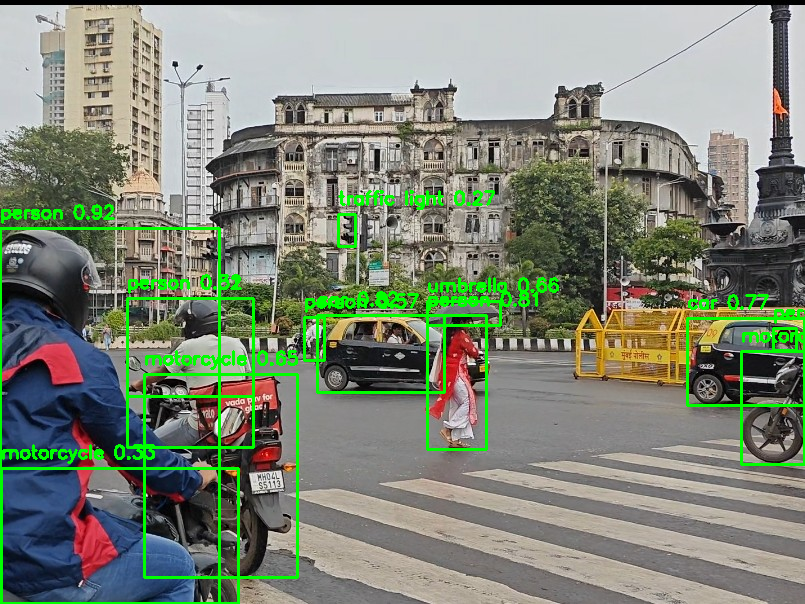

In [4]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load YOLOv8 pre-trained model
model = YOLO("yolov8n.pt")  # nano model (fast)

# Read input image
image = cv2.imread("input.jpg")

# Perform object detection
results = model(image)

# Draw bounding boxes
for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        confidence = float(box.conf[0])
        class_id = int(box.cls[0])
        label = model.names[class_id]

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(
            image,
            f"{label} {confidence:.2f}",
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            (0, 255, 0),
            2
        )

# Show output
cv2_imshow(image)
